In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
file_path = "C:\\Users\\trist\\Downloads\\samsung.csv"
data = pd.read_csv(file_path)
X = data[["Close", "Volume"]]

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [6]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

Text(0, 0.5, 'Inertia')

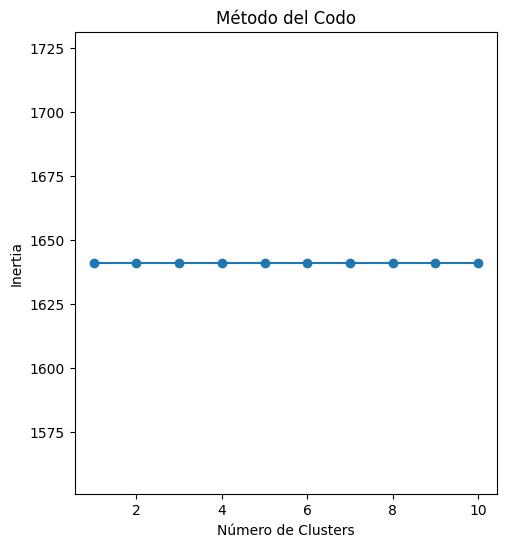

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')

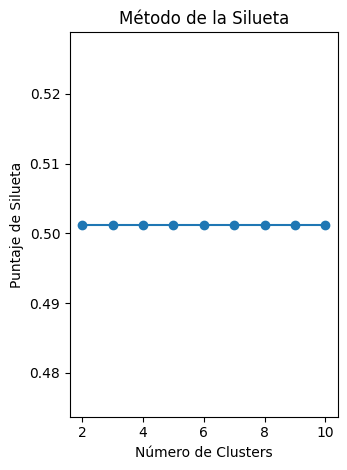

In [8]:
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Método de la Silueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntaje de Silueta')
plt.tight_layout()
plt.show()

In [9]:
optimal_k = 3

In [12]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

In [13]:
data['Cluster'] = cluster_labels

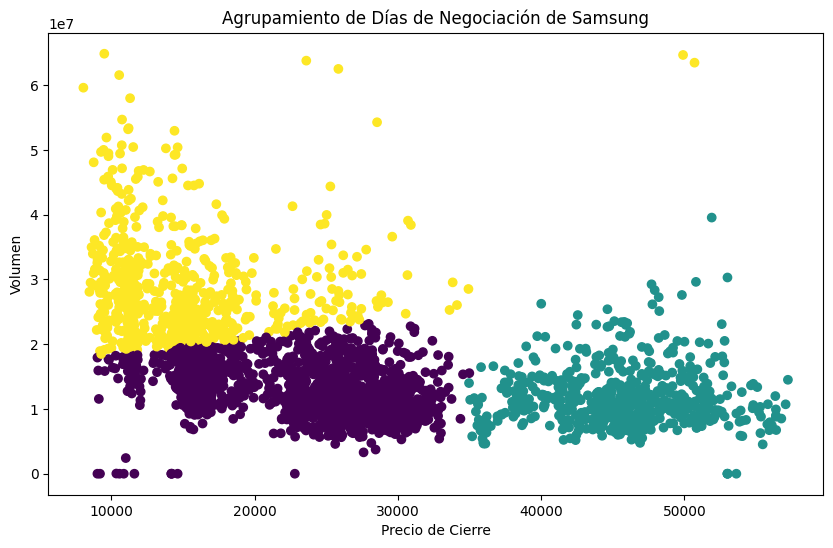

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Close'], data['Volume'], c=data['Cluster'], cmap='viridis')
plt.title('Agrupamiento de Días de Negociación de Samsung')
plt.xlabel('Precio de Cierre')
plt.ylabel('Volumen')
plt.show()